In [7]:
#What is the minimum radius of a big circle that can fit in all the provided smaller circles?
#min J = pi*R^2
#such that:
#         for all i,j: (xi - yi)^2 + (yi - yj)^2 >= (ri + rj)^2
#         for all i:   (xi - R)^2 + (yi - R)^2 <= (R - ri)^2

In [8]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np

In [9]:
model = AbstractModel()
#represents all the circles
model.i = Set()
#alias of set i
model.j = Set(initialize=model.i)
model.R = Param(model.i)
model.x = Var(model.i, bounds=(0,10), within=NonNegativeReals, initialize=2)
model.y = Var(model.i, bounds=(0,10), within=NonNegativeReals, initialize=4)
#Radius of bigger circle
model.Radius = Var(bounds=(0,100), within=NonNegativeReals, initialize=6)

def rule_eq1(model,i,j):
    if i<j:
        return (model.x[i] - model.x[j])**2 + (model.y[i] - model.y[j])**2 >= (model.R[i] + model.R[j])**2
    else:
        return Constraint.Skip;
model.eq1 = Constraint(model.i, model.j, rule=rule_eq1)

def rule_eq2(model,i):
    return (model.x[i] - model.Radius)**2 + (model.y[i] - model.Radius)**2 <= (model.Radius - model.R[i])**2
model.eq2 = Constraint(model.i, rule=rule_eq2)

model.obj = Objective(expr=model.Radius, sense=minimize)
opt = SolverFactory('ipopt')

In [10]:
instance = model.create_instance("ExRadius.dat")
results = opt.solve(instance) #solves and updates instance

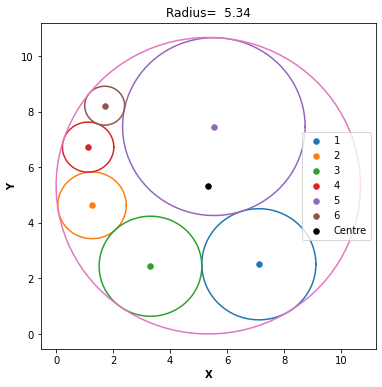

In [12]:
#f, ax = plt.subplot(1,1)
fig = plt.figure(figsize=(6,6))
theta = np.linspace(0, 2*np.pi, 100)
for i in instance.i:
    plt.scatter(value(instance.x[i]), value(instance.y[i]), label=str(i), s=30)
    Xc = value(instance.x[i]) + value(instance.R[i])*np.cos(theta)
    Yc = value(instance.y[i]) + value(instance.R[i])*np.sin(theta)
    plt.plot(Xc, Yc)

Xc = value(instance.Radius) + value(instance.Radius)*np.cos(theta)
Yc = value(instance.Radius) + value(instance.Radius)*np.sin(theta)
plt.plot(Xc, Yc)
plt.scatter(value(instance.Radius), value(instance.Radius),color='black',label='Centre', s=30)
plt.title('Radius= ' + str("%5.2f"% value(instance.Radius)))
plt.legend(loc='right')
#plt.axis('off')
plt.xlabel('X', fontweight='bold')
plt.ylabel('Y', fontweight='bold')
plt.show()